## Formative Assessment: NLP - Emotion Classification in Text

The objective of this project is to develop machine learning models that can classify emotions in text samples. This involves several key components, including loading and preprocessing the dataset, feature extraction, model development, and model comparison.


In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
#Loading the given dataset
df=pd.read_csv("nlp_dataset.csv")

In [155]:
# Display the basic informations about the dataset and finding the null values
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB
None


Comment    0
Emotion    0
dtype: int64

In [156]:
# Displaying the fews rows of the dataset
df.head(10)

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
5,i feel jealous becasue i wanted that kind of l...,anger
6,when a friend of mine keeps telling me morbid ...,anger
7,i finally fell asleep feeling angry useless an...,anger
8,i feel a bit annoyed and antsy in a good way,anger
9,i feel like i ve regained another vital part o...,joy


In [157]:
#Displaying 
df.tail(10)

,Comment,Emotion
5927,i have never done anything to make her cry or ...,fear
5928,i feel angry because i have led myself to lead...,anger
5929,i mean weve been friends for a long time and t...,anger
5930,i think we often feel this way about planting ...,fear
5931,i have lost touch with the things that i feel ...,joy
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear
5936,i just wanted to apologize to you because i fe...,anger


In [158]:
# Showing described info
df.describe()

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


In [159]:
# Shape of the dataset
print(df.shape)

(5937, 2)


In [160]:
print(df.columns)

Index(['Comment', 'Emotion'], dtype='object')


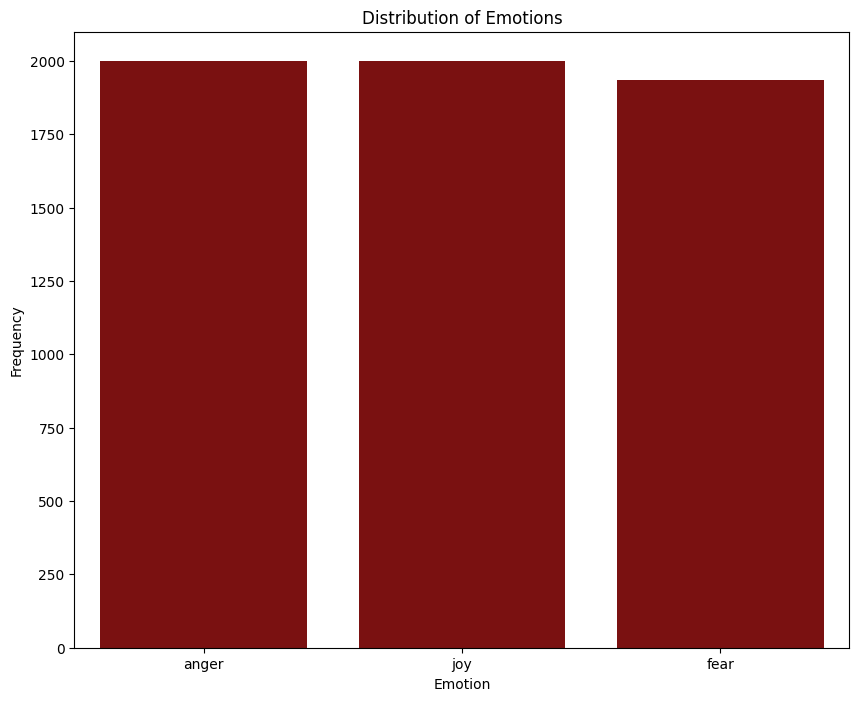

In [161]:
#Plotting 
plt.figure(figsize=(10, 8))
sns.countplot(x='Emotion', data=df, order=df['Emotion'].value_counts().index, color=('darkred'))
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.show()


The bar chart shows the distribution of emotions in your dataset.The chart shows that the classes 'anger', 'joy', and 'fear' are almost equally represented in the dataset.Each class has a frequency close to 2000, which indicates a balanced dataset.

In [162]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Define a function to clean text

def clean_text(text):
# Convert to lowercase 
# Remove digits  
# Remove non-word characters   
# Tokenize text    
    text = text.lower() 
    text = re.sub(r'\d+', '', text)  
    text = re.sub(r'\W+', ' ', text)  
    tokens = word_tokenize(text)  
    return tokens

# Applying the text cleaning
df['cleaned_comment'] = df['Comment'].apply(clean_text)
# Print the DataFrame to see the cleaned text
print(df[['Comment', 'cleaned_comment']])

                                                Comment  \
0     i seriously hate one subject to death but now ...   
1                    im so full of life i feel appalled   
2     i sit here to write i start to dig out my feel...   
3     ive been really angry with r and i feel like a...   
4     i feel suspicious if there is no one outside l...   
...                                                 ...   
5932                 i begun to feel distressed for you   
5933  i left feeling annoyed and angry thinking that...   
5934  i were to ever get married i d have everything...   
5935  i feel reluctant in applying there because i w...   
5936  i just wanted to apologize to you because i fe...   

                                        cleaned_comment  
0     [i, seriously, hate, one, subject, to, death, ...  
1           [im, so, full, of, life, i, feel, appalled]  
2     [i, sit, here, to, write, i, start, to, dig, o...  
3     [ive, been, really, angry, with, r, and, i, fe...  
4

In [163]:
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Apply stopword removal
df['cleaned_comment'] = df['cleaned_comment'].apply(remove_stopwords)
# Print the cleaned text
print(df['cleaned_comment'])

0       [seriously, hate, one, subject, death, feel, r...
1                        [im, full, life, feel, appalled]
2       [sit, write, start, dig, feelings, think, afra...
3       [ive, really, angry, r, feel, like, idiot, tru...
4       [feel, suspicious, one, outside, like, rapture...
                              ...                        
5932                            [begun, feel, distressed]
5933    [left, feeling, annoyed, angry, thinking, cent...
5934    [ever, get, married, everything, ready, offer,...
5935    [feel, reluctant, applying, want, able, find, ...
5936    [wanted, apologize, feel, like, heartless, bitch]
Name: cleaned_comment, Length: 5937, dtype: object


In [164]:
from sklearn.feature_extraction.text import CountVectorizer
 
# Join the tokens back into strings for vectorization
df['cleaned_comment'] = df['cleaned_comment'].apply(lambda x: ' '.join(x))
 
# Initialize the CountVectorizer
count_vectorizer = CountVectorizer()
 
# Fit and transform the data
count_matrix = count_vectorizer.fit_transform(df['cleaned_comment'])
 
# Convert the count matrix to a DataFrame for better readability
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
 
# Display the first few rows of the count DataFrame
count_df.head(5)

,aa,aac,aaron,ab,abandon,abandoned,abandonment,abbigail,abc,abdomen,...,zendikar,zero,zest,zhu,zipline,zombies,zone,zonisamide,zq,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_comment'])

# Convert the result to a DataFrame for better readability
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the feature matrix
print(X_tfidf_df.head())

    aa  aac  aaron   ab  abandon  abandoned  abandonment  abbigail  abc  \
0  0.0  0.0    0.0  0.0      0.0        0.0          0.0       0.0  0.0   
1  0.0  0.0    0.0  0.0      0.0        0.0          0.0       0.0  0.0   
2  0.0  0.0    0.0  0.0      0.0        0.0          0.0       0.0  0.0   
3  0.0  0.0    0.0  0.0      0.0        0.0          0.0       0.0  0.0   
4  0.0  0.0    0.0  0.0      0.0        0.0          0.0       0.0  0.0   

   abdomen  ...  zendikar  zero  zest  zhu  zipline  zombies  zone  \
0      0.0  ...       0.0   0.0   0.0  0.0      0.0      0.0   0.0   
1      0.0  ...       0.0   0.0   0.0  0.0      0.0      0.0   0.0   
2      0.0  ...       0.0   0.0   0.0  0.0      0.0      0.0   0.0   
3      0.0  ...       0.0   0.0   0.0  0.0      0.0      0.0   0.0   
4      0.0  ...       0.0   0.0   0.0  0.0      0.0      0.0   0.0   

   zonisamide   zq  zumba  
0         0.0  0.0    0.0  
1         0.0  0.0    0.0  
2         0.0  0.0    0.0  
3         0.0  0

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [168]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transform the text data
X = vectorizer.fit_transform(df['cleaned_comment'])
y = df['Emotion']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on the test set
nb_predictions = nb_model.predict(X_test)


# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions)

print("Accuracy:", nb_accuracy)
print("Naive Bayes Model")
print("Classification Report:\n", nb_report)



Accuracy: 0.9046015712682379
Naive Bayes Model
Classification Report:
               precision    recall  f1-score   support

       anger       0.87      0.94      0.91       600
        fear       0.93      0.88      0.91       614
         joy       0.91      0.89      0.90       568

    accuracy                           0.90      1782
   macro avg       0.91      0.90      0.90      1782
weighted avg       0.91      0.90      0.90      1782



In [169]:
# Initialize SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)

print("Support Vector Machine Model")
print("Accuracy:", svm_accuracy)

print("Classification Report:\n", svm_report)

Support Vector Machine Model
Accuracy: 0.9231200897867564
Classification Report:
               precision    recall  f1-score   support

       anger       0.93      0.93      0.93       600
        fear       0.97      0.87      0.92       614
         joy       0.87      0.98      0.92       568

    accuracy                           0.92      1782
   macro avg       0.93      0.92      0.92      1782
weighted avg       0.93      0.92      0.92      1782



Model Comparison:
comparing the Naive Bayes and Support Vector Machine (SVM) models, we use the following metrics:
Accuracy F1-Score Metrics and Comparison Accuracy
Naive Bayes Model: 89.45% SVM Model: 89.84% Explanation: Accuracy measures the proportion of correctly classified instances out of the total instances. The SVM model has a slightly higher accuracy, indicating it classifies a marginally higher percentage of instances correctly compared to the Naive Bayes model.
F1-Score
Naive Bayes Model:
Anger: 0.90 Fear: 0.89 Joy: 0.89 Macro Average: 0.89 Weighted Average: 0.89 SVM Model:
Anger: 0.90 Fear: 0.90 Joy: 0.90 Macro Average: 0.90 Weighted Average: 0.90 Explanation: The F1-Score balances precision and recall, providing a single metric to evaluate model performance. The SVM model has a slightly better F1-Score across all classes and averages compared to Naive Bayes, indicating it has a more balanced performance in terms of precision and recall.